# Импорт

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [58]:
data = pd.read_csv(
    '../Data/DataLaba1/energy_task_moded_removed_nan.csv').drop('year', axis=1)
a = -1
b = 1
power = 2
# data = data.apply(lambda s: a + (s - s.min())/(s.max() - s.min()) * (b-a))
sl = data.shape[0]
scale = StandardScaler().fit_transform(data)
# y_data = StandardScaler().fit_transform(data['Appliances'][0:sl])
X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(power).fit_transform(data.drop('Appliances', axis=1)), scale.T[-1], test_size=0.25)


In [59]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(int(X_train.shape[1]*1.5),
                                activation='sigmoid',
                                input_shape=(X_train.shape[1],),
                                name='input',
                              #   kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                # bias_initializer=tf.keras.initializers.GlorotNormal,
                                use_bias=True
                                ))
model.add(tf.keras.layers.Dense(int(X_train.shape[1]//2),
                                activation='sigmoid',
                                name='hidden_layer_2',
                                #   bias_constraint=tf.keras.constraints.max_norm(1000.),
                                # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                use_bias=True,
                                # bias_initializer=tf.keras.initializers.GlorotNormal
                                ))
model.add(tf.keras.layers.Dense(int(X_train.shape[1]*0.5),
                                activation='sigmoid',
                                name='hidden_layer_3',
                                #   bias_constraint=tf.keras.constraints.max_norm(1000.),
                                # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                use_bias=True,
                                # bias_initializer=tf.keras.initializers.GlorotNormal
                                ))
model.add(tf.keras.layers.Dense(1,
                                name='output',
                                activation='tanh',
                                # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                use_bias=True,
                                # bias_initializer=tf.keras.initializers.HeNormal
                                ))
model.compile(loss='mse',optimizer='Adam', metrics=['mse'])


## Компиляция

In [60]:
model.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mse', 'mae'],
    jit_compile=True
)


# Обучение

In [61]:
model.fit(
    X_train,
    y_train,
    validation_split=0.6,
    epochs=50,
    batch_size=15,
    # workers=4,
    use_multiprocessing=True,
)


Epoch 1/50
371/371 [==============================] - 4s 9ms/step - loss: 0.1006 - mse: 0.1006 - mae: 0.2201 - val_loss: 0.0804 - val_mse: 0.0804 - val_mae: 0.1875
Epoch 2/50
371/371 [==============================] - 3s 7ms/step - loss: 0.0798 - mse: 0.0798 - mae: 0.1917 - val_loss: 0.0788 - val_mse: 0.0788 - val_mae: 0.1850
Epoch 3/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0803 - mse: 0.0803 - mae: 0.1936 - val_loss: 0.0773 - val_mse: 0.0773 - val_mae: 0.1750
Epoch 4/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0764 - mse: 0.0764 - mae: 0.1760 - val_loss: 0.0794 - val_mse: 0.0794 - val_mae: 0.1941
Epoch 5/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0771 - mse: 0.0771 - mae: 0.1814 - val_loss: 0.0770 - val_mse: 0.0770 - val_mae: 0.1761
Epoch 6/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0766 - mse: 0.0766 - mae: 0.1789 - val_loss: 0.0768 - val_mse: 0.0768 - val_mae: 0.1745
Epoch 7/50
371/3

# Predict

In [62]:
y_predicted = model.predict(X_test).T[0]


145/145 [==============================] - 0s 2ms/step


In [63]:
y_predicted


array([-0.4663584 , -0.5141823 ,  0.1668483 , ..., -0.99999833,
        0.10793065, -0.78095347], dtype=float32)

In [64]:
y_predicted.mean(), y_predicted.std()


(0.0010472862, 0.7912832)

In [65]:
model.weights

[<tf.Variable 'input/kernel:0' shape=(435, 652) dtype=float32, numpy=
 array([[-0.01076062,  0.03762376,  0.01308363, ...,  0.06305014,
         -0.00532645,  0.01233457],
        [-0.04413902, -0.01582864,  0.06768589, ...,  0.03358386,
         -0.00095084,  0.0527555 ],
        [-0.05681602,  0.07603432, -0.0455059 , ..., -0.06745274,
          0.06977186,  0.06996816],
        ...,
        [-0.05143149,  0.05338324,  0.02254663, ..., -0.07675478,
          0.03621864, -0.04608047],
        [ 0.04871315,  0.03494053,  0.05998925, ...,  0.03712463,
         -0.02392693, -0.02896751],
        [ 0.00380022, -0.0327751 , -0.01508961, ...,  0.00338907,
          0.03057764, -0.04732064]], dtype=float32)>,
 <tf.Variable 'input/bias:0' shape=(652,) dtype=float32, numpy=
 array([-1.09047505e-06,  2.64742121e-04,  1.17515156e-03,  0.00000000e+00,
         0.00000000e+00,  4.73230844e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.69551964e-10, -1.14182418e-04,  0.00000000e

# Оценка качества 

In [66]:
y_all = model.predict(PolynomialFeatures(power).fit_transform(
    data.drop('Appliances', axis=1)[0:sl])).T[0]


580/580 [==============================] - 1s 2ms/step


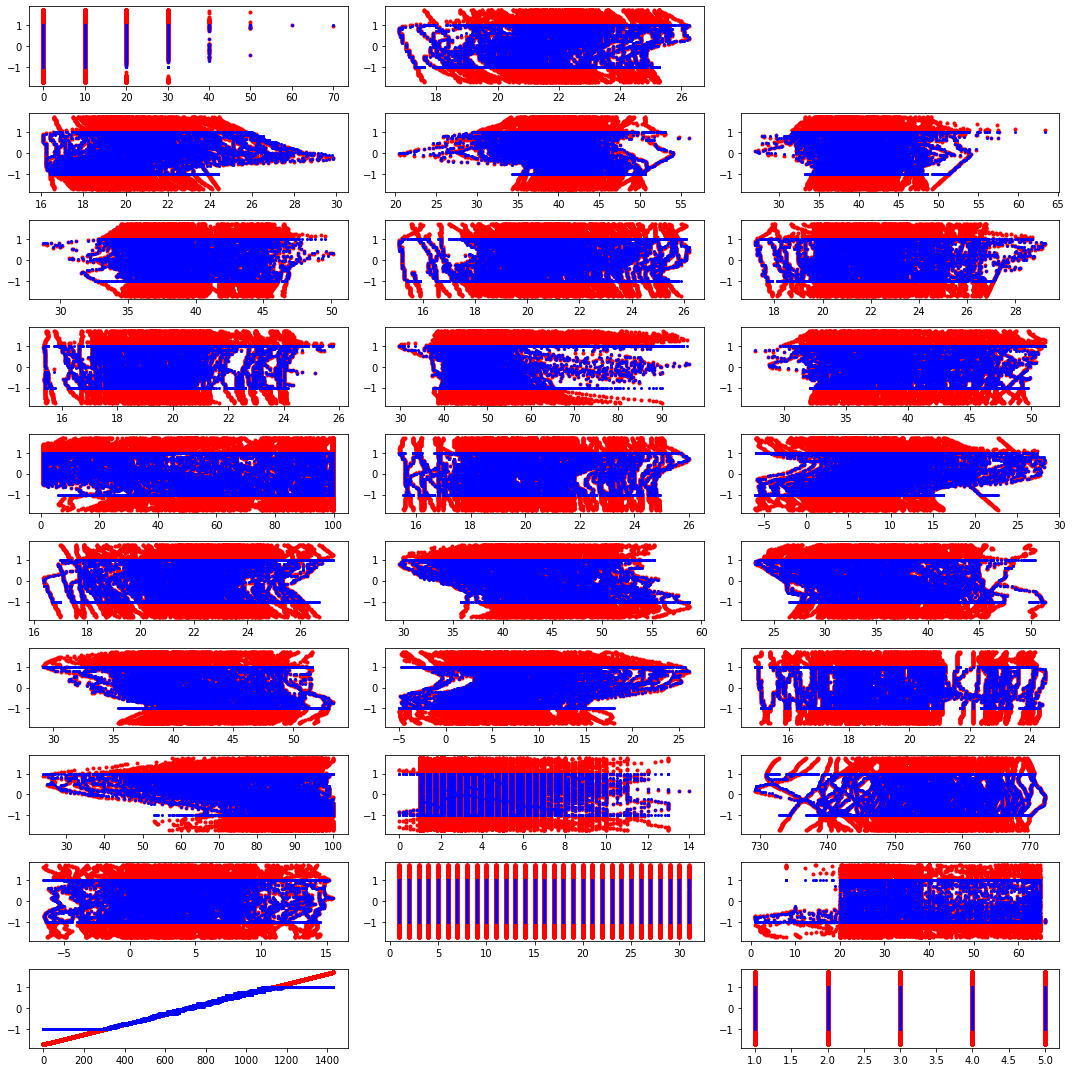

In [67]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
c = data.drop('Appliances', axis=1).columns
xl = c.shape[0] // 3 + (c.shape[0] % 3 > 0)
yl = 3
gs = gridspec.GridSpec(xl, yl)
z=0
k=0
for i in c:
  z = z % xl
  k = k % yl
  ax = fig.add_subplot(gs[int(z), int(k)])
  ax.plot(data[i], scale.T[-1], 'ro', markersize=3)
  ax.plot(data[i], y_all, 'bo', markersize=2)
  k+=1
  z+=(k % 3) // 2
  

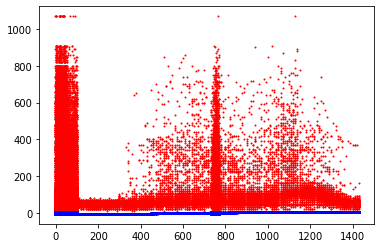

In [68]:
plt.plot(data.drop('Appliances', axis=1)[0:sl],
         data['Appliances'][0:sl], 'ro', markersize=1)
plt.plot(data.drop('Appliances', axis=1)[0:sl], y_all*6.1, 'bo', markersize=1)


In [70]:
print(f"MAE: {mean_absolute_error(y_predicted*2.7, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted*2.7, y_test)}',
      f'MSE: {mean_squared_error(y_predicted*2.7, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted*2.7, y_test)}',
      f'R^2: {r2_score(y_predicted, y_test)}',
      sep='\n')

MAE: 1.0744052174541419
RMSE: 1.3701038346992567
MSE: 1.1705143462167633
MAPE: 0.5988015635326307
R^2: 0.8774028095158024
